# Exercises in statistics

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

## Exercise 1

In this exercise we will use the penguins dataset (can be imported using the code `penguins_data = sns.load_dataset("penguins")`)

Please answer the following questions:
1. For the different species of penguins (Adelie, Chinstrap, and Gentoo), how many penguins are there of each species?
2. For the different species of penguins (Adelie, Chinstrap, and Gentoo), is the body mass variable normally distributed?
3. Test whether there is a difference in body mass for Adelie penguins and Chinstrap penguins. Remember to justify your choice of test, clearly state the null hypothesis and alternative hypothesis, and state the significance level you will use. Hint: If your test give `nan` values you might need to drop missing values with the `dropna` method.
4. Test whether there is a difference in body mass for Chinstrap penguins and Gentoo penguins. Remember to justify your choice of test. Remember to justify your choice of test, clearly state the null hypothesis and alternative hypothesis, and state the significance level you will use. Hint: If your test give `nan` values you might need to drop missing values with the `dropna` method.

In [3]:
penguins_data = sns.load_dataset("penguins")

1. For the different species of penguins (Adelie, Chinstrap, and Gentoo), how many penguins are there of each species?

In [5]:
penguins_data["species"].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [12]:
penguins_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


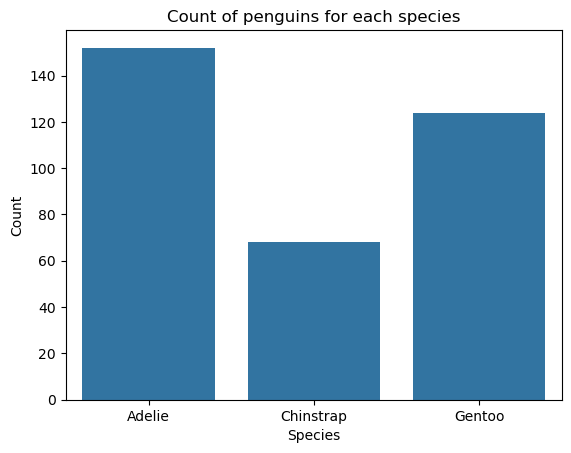

In [9]:
sns.countplot(x="species", data=penguins_data)
plt.title("Count of penguins for each species")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()

2. For the different species of penguins (Adelie, Chinstrap, and Gentoo), is the body mass variable normally distributed?
YES, LOOKS NORMALLY DISTRIBUTED!

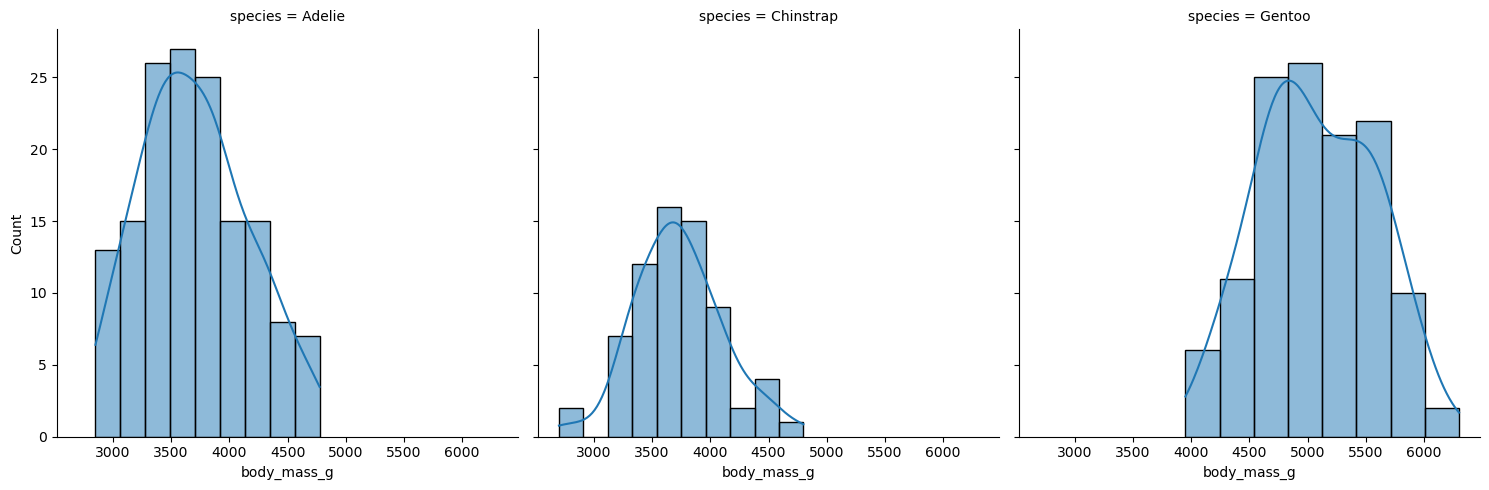

In [24]:
g=sns.FacetGrid(penguins_data, col="species", height = 5)
g.map(sns.histplot, "body_mass_g", kde=True)

3. Test whether there is a difference in body mass for Adelie penguins and Chinstrap penguins. Remember to justify your choice of test, clearly state the null hypothesis and alternative hypothesis, and state the significance level you will use. Hint: If your test give `nan` values you might need to drop missing values with the `dropna` method.

Null hypothesis = No difference in body mass between Adelie and Chinstrap, P-value threshold = 0.05

In [18]:
penguins_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [25]:
penguins_data_copy = penguins_data.copy()

In [32]:
penguins_data_copy = penguins_data_copy.dropna()

In [29]:
penguins_data_copy.isna()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,True,True,True,True,True
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


In [34]:
penguins_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [36]:
stats.ttest_ind(penguins_data_copy[penguins_data_copy["species"]=="Adelie"]["body_mass_g"], penguins_data_copy[penguins_data_copy["species"]=="Chinstrap"]["body_mass_g"])

TtestResult(statistic=np.float64(-0.42011219955863177), pvalue=np.float64(0.6748289682757558), df=np.float64(212.0))

## Exercise 2

Load in the "fb_like_and_share.csv" data and answer the following questions:

1. Is there a difference in the distribution of likes for photos and videos? Justify your choice of test(s).
2. Is there a difference in the distribution of share counts for photos and videos? Justify your choice of test(s).
3. Perform an ANOVA test to test if there is a difference in means across type of posts for shares. Does it make sense to perform this ANOVA test?
4. Is there actually a statistical significant difference in the distribution of share counts for any two groups?

## Exercise 3

Load in the data "energySoftware.csv" and answer the following questions:
1. Plot the distribution of CPU for each test type
2. Is there a difference in the CPU between bubblesort and bubblesort_ll? (note that the last name contains two small l's and not two capital i's) Justify your choice of test(s). 
3. Is there a difference in the CPU between bubblesort_func and bubblesort_ll2? Justify your choice of test(s). If there is a difference, how big is it?
4. When it comes to time, is there a difference between bubblesort and bubblesort_ll? Justify your choice of test(s).
5. Perform an ANOVA test to test if there is a difference in means across groups for CPU
6. Perform an ANOVA test to test if there is a difference in means across groups for time